In [2]:
import xarray as xr
import rasterio as rio
import matplotlib.pyplot as plt

In [6]:
# ds = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/forcings/forcing_2021.nc").load()
# ds = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/vic_results/nc_fluxes.2001-04-01.nc")
# ds = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/metsim_results/6H_VIC_20210822-20210823.nc")
ds = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/metsim_inputs/metsim_input.nc")
# ds = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/nc/combined_data.nc", engine='netcdf4')

In [1]:
ds

NameError: name 'ds' is not defined

In [8]:
# ds['air_pressure'].sel(time="2021-08-22 00:00:00").plot()
ds['precip'].sel(time="2001-08-23").plot()

KeyError: '2001-08-23'

In [42]:
existing = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/forcings/forcing_2021.nc").load()
existing

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, time: 936)
Coordinates:
  * time            (time) datetime64[ns] 2021-01-01 ... 2021-08-22T18:00:00
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
Data variables:
    air_pressure    (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    longwave        (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    prec            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    shortwave       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    temp            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    vapor_pressure  (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    wind            (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [43]:
ds = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/metsim_results/6H_VIC_20210822-20210823.nc").load()
ds

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, time: 8)
Coordinates:
  * time            (time) datetime64[ns] 2021-08-22 ... 2021-08-23T18:00:00
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
Data variables:
    air_pressure    (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    longwave        (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    prec            (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    shortwave       (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    temp            (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    vapor_pressure  (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    wind            (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
Attributes: (12/32)
    conventions:              1.6
    title:                    Output from MetSim
    institution:              University of Washington
    source:                   metsim.py
    history:                  Created: Thu Aug 26 23:02:25 2021 by skahmad
    comment:                  no comment at this time
    ...                       ...
    tday_coef:                0.45
    lapse_rate:               0.0065
    chunks:                   {lat: 30, lon: 20}
    scheduler:                distributed
    forcing:                  /houston2/pritam/rat_mekong_v3/backend/data/met...
    in_format:                netcdf

In [44]:
# ds.time.intersection(existing.time)

In [45]:
# xr.combine_by_coords([existing, ds], compat='broadcast_equals')

In [46]:
last_existing_time = existing.time[-1]
last_existing_time
ds = ds.sel(time=slice(last_existing_time, ds.time[-1]))
ds = ds.isel(time=slice(1, None))
ds

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, time: 4)
Coordinates:
  * time            (time) datetime64[ns] 2021-08-23 ... 2021-08-23T18:00:00
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
Data variables:
    air_pressure    (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    longwave        (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    prec            (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    shortwave       (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    temp            (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    vapor_pressure  (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
    wind            (time, lat, lon) float32 9.969e+36 9.969e+36 ... 9.969e+36
Attributes: (12/32)
    conventions:              1.6
    title:                    Output from MetSim
    institution:              University of Washington
    source:                   metsim.py
    history:                  Created: Thu Aug 26 23:02:25 2021 by skahmad
    comment:                  no comment at this time
    ...                       ...
    tday_coef:                0.45
    lapse_rate:               0.0065
    chunks:                   {lat: 30, lon: 20}
    scheduler:                distributed
    forcing:                  /houston2/pritam/rat_mekong_v3/backend/data/met...
    in_format:                netcdf

In [47]:
xr.merge([existing, ds])

<xarray.Dataset>
Dimensions:         (lat: 388, lon: 237, time: 940)
Coordinates:
  * time            (time) datetime64[ns] 2021-01-01 ... 2021-08-23T18:00:00
  * lat             (lat) float64 33.78 33.72 33.66 33.59 ... 9.719 9.656 9.594
  * lon             (lon) float64 93.91 93.97 94.03 94.09 ... 108.5 108.6 108.7
Data variables:
    air_pressure    (time, lat, lon) float32 nan nan nan ... 9.969e+36 9.969e+36
    longwave        (time, lat, lon) float32 nan nan nan ... 9.969e+36 9.969e+36
    prec            (time, lat, lon) float32 nan nan nan ... 9.969e+36 9.969e+36
    shortwave       (time, lat, lon) float32 nan nan nan ... 9.969e+36 9.969e+36
    temp            (time, lat, lon) float32 nan nan nan ... 9.969e+36 9.969e+36
    vapor_pressure  (time, lat, lon) float32 nan nan nan ... 9.969e+36 9.969e+36
    wind            (time, lat, lon) float32 nan nan nan ... 9.969e+36 9.969e+36

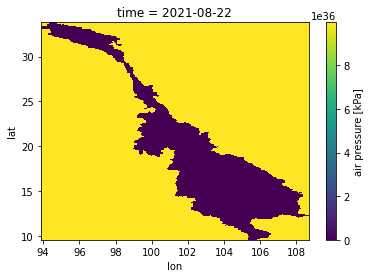

In [14]:
# xr.combine_by_coords([existing, ds])
# xr.merge([ds, existing], compat='override', join='outer').sel(time='2021-08-22 00:00:00')['air_pressure'].plot()
# existing.update(ds)
# existin.assign()
# existing.combine_first(ds).sel(time='2021-08-22 00:00:00')['air_pressure'].plot()

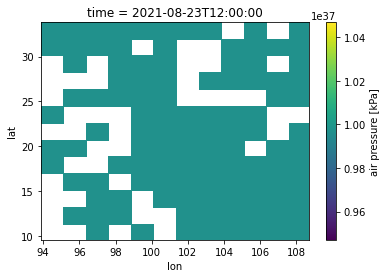

In [26]:
xr.concat([existing, ds], dim='time').sel(time='2021-08-23 12:00:00')['air_pressure'].plot()

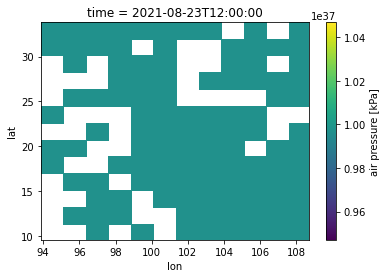

In [29]:
ds['air_pressure'].sel(time='2021-08-23 12:00:00').plot()

In [ ]:
ds = ds.sel(time=slice("2021-01-01", "2021-08-22"))
ds

In [ ]:
ds.close()

In [ ]:
ds.to_netcdf("/houston2/pritam/rat_mekong_v3/backend/data/forcings/forcing_2021.nc")

In [ ]:
r = rio.open("/houston2/pritam/rat_mekong_v3/backend/data/processed/precipitation/2021-08-22_IMERG.asc")
r

In [ ]:
plt.imshow(r.read(1))

In [ ]:
f21 = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/forcings/forcing_2021.nc").load()

In [ ]:
f21

In [ ]:
f21.sel(time='2021-01-02 00:00:00')['prec'].plot()

In [ ]:
ms = xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/data/metsim_results/6H_VIC_20210101-20210822.nc").load()

In [ ]:
ms

In [ ]:
ds.OUT_RUNOFF.isel(time=0).plot(vmin=0, vmax=200)

In [ ]:
import holoviews as hv

hv.extension('bokeh')


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%output holomap='scrubber'
%%opts Image style(cmap='viridis') plot[colorbar=True]
%%opts Image [width=500, height=400]
hv_ds = hv.Dataset(ds.OUT_RUNOFF[:300])
hv_ds.to(hv.Image, kdims=['lon', 'lat'], rtol=1, dynamic=False)

In [ ]:
ds.OUT_RUNOFF.plot()

In [ ]:
# Let's check the forcings
xr.open_dataset("../backend/data/forcings/forcings_proleptic_gregorian_2001.nc").longwave.isel(time=3).plot(size=10)

In [ ]:
ds.OUT_RUNOFF.sel(lat=20.031, lon=101.031)

In [ ]:
ds.lon[ds.lon>101]

In [ ]:
# Checking domain
xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/params/vic/domain.nc").mask.plot()

In [ ]:
# Checking run_cell
xr.open_dataset("/houston2/pritam/rat_mekong_v3/backend/params/vic/params_all_mekong.nc").run_cell.plot()